In [500]:
# pip install sklearn

In [501]:
# pip install -U numpy

In [502]:
import pandas as pd
import numpy as np
import sympy as sp
from sklearn.linear_model import LinearRegression
import seaborn as sns
# from sklearn import linear_model
import matplotlib.pyplot as plt
house = pd.read_csv('housing_price.csv')
house.head()

,inverse age of flat (year-1),inverse distance to the nearest MRT station (km-1),price per square metre ($ in thousands)
0,0.160,7.404,8.913
1,0.114,1.789,6.308
2,0.049,1.379,5.963
3,0.046,1.373,5.511
4,0.183,15.948,9.774


In [503]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   inverse age of flat (year-1)                        30 non-null     float64
 1   inverse distance to the nearest MRT station (km-1)  30 non-null     float64
 2   price per square metre ($ in thousands)             30 non-null     float64
dtypes: float64(3)
memory usage: 848.0 bytes


<AxesSubplot:>

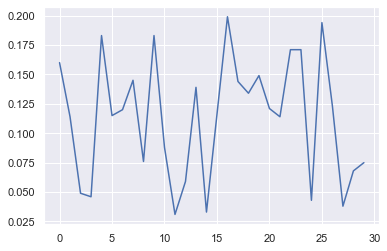

In [504]:
house['inverse age of flat (year-1)'].plot()

<AxesSubplot:>

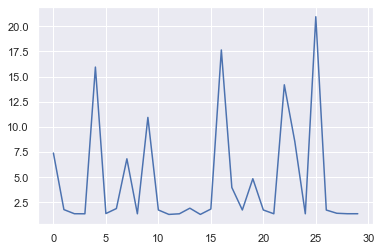

In [505]:
house['inverse distance to the nearest MRT station (km-1)'].plot()

<AxesSubplot:>

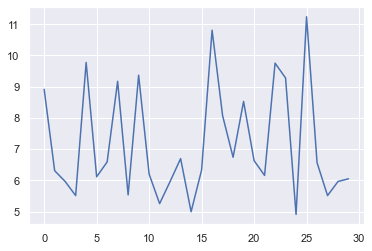

In [506]:
house['price per square metre ($ in thousands)'].plot()

In [507]:
data = house[['inverse distance to the nearest MRT station (km-1)', 'price per square metre ($ in thousands)']]
data.columns =['x','y']
data

,x,y
0,7.404,8.913
1,1.789,6.308
2,1.379,5.963
3,1.373,5.511
4,15.948,9.774
5,1.397,6.114
6,1.894,6.588
7,6.836,9.171
8,1.373,5.533
9,10.948,9.365


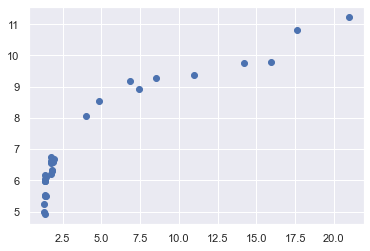

In [508]:
plt.scatter(data.x,data.y)
plt.show()

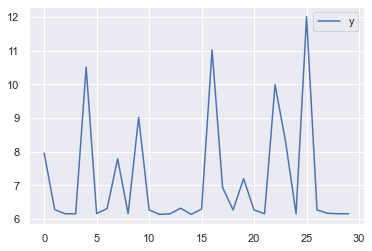

In [509]:
LR = LinearRegression()
LR.fit(data[['x']],data[['y']])
pred=LR.predict(data[['x']])
pred = pd.DataFrame(pred,columns=['y'])
pred.plot()
plt.show()

In [510]:
import statsmodels.api as sm
ols = sm.OLS(data.x,data.y)
result=ols.fit().params
# print(result.summary())

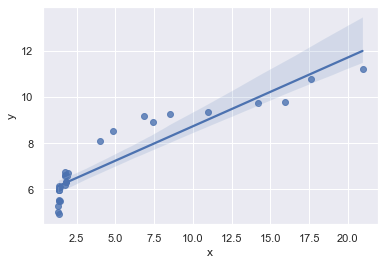

In [511]:
sns.regplot(x='x',y='y',data=data)
plt.show()

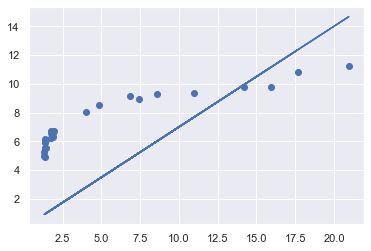

In [512]:
## attempt to code out a best fit line which passes through the origin
# y = mx + b where b = 0 
# let m = 0.7
# y = 3x + 0
# y = 3x
y = 0.7*data.x
plt.scatter(data.x,data.y)
plt.plot(data.x,y)
plt.show()



### We will then try to figure out the best gradient aka m 
*To determine best, we need to find error term* 


In [513]:
# # errorterm=pd.DataFrame(columns=['error'])
# errorterm=np.array([])
# def error(x,y):
#     for x in np.linspace(0.1,1,1000000):
#         y = x*data.x
#         e = (data.y - y)**2/len(data.y)
#         error=np.append(errorterm,e)
#     error=pd.DataFrame(error,columns=['errors'])
#     return error.index[error.errors==error.errors.min()][0]

# print(error(data.x,data.y))

In [514]:
# x=np.linspace(0.1,1,1000000)
# x[17]

In [515]:
# type(errorterm)

In [516]:
n = len(data)
b = sp.symbols('b')
se =[]
for i in data.x:
  yhat = b*data.x
  error = data.y - yhat
  se.append(error**2)

se =np.mean(se) 
sp.simplify(se)

52.9560529666666*b**2 - 86.1205782*b + 54.4808258

In [517]:
sp.diff(se)

105.912105933333*b - 86.1205782

# Gradient Descent for 1 variable

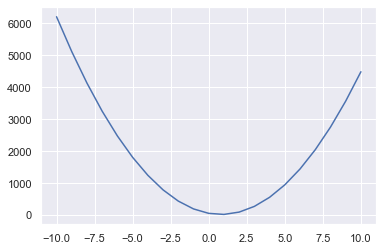

In [518]:
x = np.arange(-10,11,1)
y=52.9560529666666*x**2-86.1205782*x+54.4808258
plt.plot(x,y)
plt.show()

In [519]:
b = sp.symbols('b')
rate = 0.01 #Set Learning Rate
epsilon = 0.0001 #Stop algorithm when absolute difference between 2 consecutive x-values is less than equation 
max_iter = 1000 # maximum number of iterations
f = lambda b: 52.9560529666666*b**2-86.1205782*b+54.4808258
deriv = lambda b: 105.912105933333*b -86.1205782# derivative of f

x_new_list =[]

def gradient_desc(x):
    diff=1 # differenece between 2 consecutive iterates 
    iter = 1 #iteration counter
    #Now Gradient descent 
    while diff > epsilon and iter < max_iter:
        x_new = x - rate*deriv(x)
        print("Iteration ",iter,": x = ",x_new,", f(x) = ",f(x_new))
        diff = abs(x_new - x)
        f_value = f(x_new)
        iter += 1
        x = x_new
    print("The local minimum occurs at x = ",x_new)
    print("The minimum occurs at f(x) = ",f_value)
    x_new_list.append([round(i, 1),iter,x_new,round(f_value, 4)])
gradient_desc(0)
    





Iteration  1 : x =  0.861205782 , f(x) =  19.589487615858886
Iteration  2 : x =  0.8102903838641712 , f(x) =  19.46753193348222
Iteration  3 : x =  0.8133005561383395 , f(x) =  19.467105661827475
Iteration  4 : x =  0.813122591564715 , f(x) =  19.4671041718803
Iteration  5 : x =  0.8131331130188315 , f(x) =  19.46710416667249
The local minimum occurs at x =  0.8131331130188315
The minimum occurs at f(x) =  19.46710416667249


In [520]:
for i in np.arange(-2.5,2.5,0.1):
    gradient_desc(i)

Iteration  1 : x =  1.0090084303333247 , f(x) =  21.49888864536551
Iteration  2 : x =  0.8015521347224334 , f(x) =  19.474205862245142
Iteration  3 : x =  0.8138171706843177 , f(x) =  19.467128989208383
Iteration  4 : x =  0.8130920487654898 , f(x) =  19.467104253416494
Iteration  5 : x =  0.8131349187414766 , f(x) =  19.467104166957498
The local minimum occurs at x =  0.8131349187414766
The minimum occurs at f(x) =  19.467104166957498
Iteration  1 : x =  1.003096324399992 , f(x) =  21.378089258484216
Iteration  2 : x =  0.8019016646881028 , f(x) =  19.47378363218965
Iteration  3 : x =  0.8137965061024787 , f(x) =  19.467127513387823
Iteration  4 : x =  0.8130932704774587 , f(x) =  19.467104248258067
Iteration  5 : x =  0.8131348465125708 , f(x) =  19.467104166939457
The local minimum occurs at x =  0.8131348465125708
The minimum occurs at f(x) =  19.467104166939457
Iteration  1 : x =  0.9971842184666588 , f(x) =  21.260991817077993
Iteration  2 : x =  0.8022511946537724 , f(x) =  19.4

In [521]:
x_new_list= pd.DataFrame(x_new_list,columns=['x','iter','x_new','f_value'])
# x_new_list.iloc[[x_new_list.f_value.min()]]
#x_new_list sort by f_value and iters

x_new_list.sort_values(by= ['f_value', 'iter'],ascending=True)

,x,iter,x_new,f_value
34,0.8,4,0.813135,19.4671
30,0.4,5,0.813127,19.4671
31,0.5,5,0.813129,19.4671
32,0.6,5,0.813130,19.4671
33,0.7,5,0.813131,19.4671
35,0.9,5,0.813134,19.4671
36,1.0,5,0.813135,19.4671
37,1.1,5,0.813136,19.4671
38,1.2,5,0.813137,19.4671
0,1.4,6,0.813133,19.4671


In [522]:
# testing for best alpha
import numpy as np

alpha = np.arange(0.001,0.25,0.001)

epsilon = 0.0001 # stopping criterion
max_iters = 1000 # maximum number of iterations
iters = []

# partial derivatives and function
f = lambda b: 52.9560529666666*b**2-86.1205782*b+54.4808258
deriv = lambda b: 105.912105933333*b -86.1205782# derivative of f


for a in alpha:
  iter = 1
  diff = 1
  x = 0.8 # initial x value

  while diff > epsilon and iter < max_iter:
    
    x_new = x - a*deriv(x)
    # print("Iteration ",iter,": x = ",x_new,", f(x) = ",f(x_new))
    diff = abs(x_new - x)
    iter += 1
    x = x_new
    if (x_new>10**15):
      print (f'when alpha = {a}, it diverges')
      break
  print("The local minimum occurs at x = ",x_new)

  iters.append([a, iter, round(x_new, 4)])
  if (iter < max_iters):
    print (f'when alpha = {a}, number of iterations = {iter}')
  else: print (f'when alpha = {a}, it diverges')
# print (f'best alpha: {alpha[iters.index(min(iters))]:.3f} with {min(iters)} iterations')

The local minimum occurs at x =  0.8123329609804182
when alpha = 0.001, number of iterations = 26
The local minimum occurs at x =  0.8127629574933752
when alpha = 0.002, number of iterations = 16
The local minimum occurs at x =  0.8129367210294579
when alpha = 0.003, number of iterations = 12
The local minimum occurs at x =  0.8130403671534502
when alpha = 0.004, number of iterations = 10
The local minimum occurs at x =  0.8130655565923471
when alpha = 0.005, number of iterations = 8
The local minimum occurs at x =  0.8131017130505429
when alpha = 0.006, number of iterations = 7
The local minimum occurs at x =  0.8131173335610447
when alpha = 0.007, number of iterations = 6
The local minimum occurs at x =  0.8131253850105855
when alpha = 0.008, number of iterations = 5
The local minimum occurs at x =  0.813131180348219
when alpha = 0.009000000000000001, number of iterations = 4
The local minimum occurs at x =  0.8131352394836266
when alpha = 0.010000000000000002, number of iterations =

In [523]:
iters_df = pd.DataFrame(iters, columns=['a','iterations', 'x_new'])
iters_df = iters_df[iters_df['x_new'] == 0.8131]
#highlight iter_df iterations minimum
iters_df.style.highlight_min(subset=['iterations'],color='blue')

,a,iterations,x_new
4,0.005000,8,0.813100
5,0.006000,7,0.813100
6,0.007000,6,0.813100
7,0.008000,5,0.813100
8,0.009000,4,0.813100
9,0.010000,4,0.813100
10,0.011000,5,0.813100
12,0.013000,8,0.813100
14,0.015000,13,0.813100
15,0.016000,17,0.813100


In [524]:
b = sp.symbols('b')
rate = 0.01 #Set Learning Rate
epsilon = 0.0001 #Stop algorithm when absolute difference between 2 consecutive x-values is less than equation 
max_iter = 1000 # maximum number of iterations
f = lambda b: 52.9560529666666*b**2-86.1205782*b+54.4808258
deriv = lambda b: 105.912105933333*b -86.1205782# derivative of f


def gradient_desc(x):
    diff=1 # differenece between 2 consecutive iterates 
    iter = 1 #iteration counter
    #Now Gradient descent 
    while diff > epsilon and iter < max_iter:
        x_new = x - rate*deriv(x)
        diff = abs(x_new - x)
        f_value = f(x_new)
        iter += 1
        x = x_new
    print("The local minimum occurs at x = ",round(x_new, 4),"\nNumber of iterations: ",iter,"\nf(x) = ",round(f_value, 4))
gradient_desc(0.8)


The local minimum occurs at x =  0.8131 
Number of iterations:  4 
f(x) =  19.4671


# Model 2

## Sympy to show equation of E(a,b)

In [525]:
n = len(data)
a = sp.symbols('a')
b = sp.symbols('b')
se =[]
for i in data.x:
  yhat = a + b*data.x
  error = data.y - yhat
  se.append(error**2)

se =np.mean(se) 
print("E(a,b):",sp.simplify(se),"\nE'(a):",sp.diff(sp.simplify(se),a),"\nE'(b):",sp.diff(sp.simplify(se),b))

E(a,b): 1.0*a**2 + 9.48166666666667*a*b - 14.3246666666667*a + 52.9560529666666*b**2 - 86.1205782*b + 54.4808258 
E'(a): 2.0*a + 9.48166666666667*b - 14.3246666666667 
E'(b): 9.48166666666667*a + 105.912105933333*b - 86.1205782


In [526]:
a = sp.symbols('a')
b = sp.symbols('b')

func = lambda a,b: 1.0*a**2 + 9.48166666666667*a*b - 14.3246666666667*a + 52.9560529666666*b**2 - 86.1205782*b + 54.4808258 
partialf_a = lambda a,b: 2.0*a + 9.48166666666667*b - 14.3246666666667# partial derivative of f with respect to a
partialf_b = lambda a,b: 9.48166666666667*a + 105.912105933333*b - 86.1205782# partial derivative of f with respect to b
 


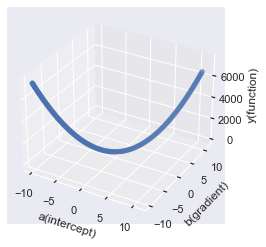

In [527]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


a = sp.symbols('a')
b = sp.symbols('b')

a = np.arange(-10,11,0.1)
b = np.arange(-10,11,0.1)
y= 1.0*a**2 + 9.48166666666667*a*b - 14.3246666666667*a + 52.9560529666666*b**2 - 86.1205782*b + 54.4808258 


ax.set_xlabel("a(intercept)")
ax.set_ylabel("b(gradient)")
ax.set_zlabel("y(function)")

ax.scatter(a, b, y)

plt.show()

In [528]:
import plotly.express as px
df = pd.DataFrame({"intercept":a,"gradient":b,"function":y})
fig = px.scatter_3d(df, x='intercept', y='gradient', z='function', color='gradient')
fig.show()



In [529]:
df.iloc[[df.function.idxmin()]]

,intercept,gradient,function
108,0.8,0.8,14.72477


## Code for univariate gradient descent 2 variables

In [530]:
# testing for best alpha
import numpy as np

next_x = 0.8 # initial x value
next_y = 0.8 # initial y value
alpha = np.arange(0.001,0.25,0.001)
epsilon = 0.001 # stopping criterion
max_iters = 500 # maximum number of iterations
diff = 1
iters = []

# partial derivatives and function
func = lambda a,b: 1.0*a**2 + 9.48166666666667*a*b - 14.3246666666667*a + 52.9560529666666*b**2 - 86.1205782*b + 54.4808258 
partialf_a = lambda a,b: 2.0*a + 9.48166666666667*b - 14.3246666666667# partial derivative of f with respect to a
partialf_b = lambda a,b: 9.48166666666667*a + 105.912105933333*b - 86.1205782# partial derivative of f with respect to b

next_func = func(next_x, next_y) # initial value of function

for a in alpha:
  iter = 1
  diff = 1
  next_x = 4 # initial x value
  next_y = 5 # initial y value
  while diff > epsilon and iter<max_iters:
    current_x = next_x
    current_y = next_y
    current_func = next_func
    next_x = current_x - a*partialf_x(current_x, current_y) # update of x
    next_y = current_y - a*partialf_y(current_x, current_y) # update of y
    next_func = func(next_x, next_y)
    diff = abs(next_func - current_func) # stopping criterion values of function converges
    iter += 1

  iters.append(iter)
  if (iter < max_iters):
    print (f'when alpha = {a}, number of iterations = {iter}')
  else: print (f'when alpha = {a}, it diverges')
print (f'best alpha: {alpha[iters.index(min(iters))]} with {min(iters)} iterations')

when alpha = 0.001, number of iterations = 336
when alpha = 0.002, it diverges
when alpha = 0.003, it diverges
when alpha = 0.004, it diverges
when alpha = 0.005, it diverges
when alpha = 0.006, it diverges
when alpha = 0.007, number of iterations = 477
when alpha = 0.008, number of iterations = 425
when alpha = 0.009000000000000001, number of iterations = 384
when alpha = 0.010000000000000002, number of iterations = 351
when alpha = 0.011, number of iterations = 323
when alpha = 0.012, number of iterations = 300
when alpha = 0.013000000000000001, number of iterations = 280
when alpha = 0.014000000000000002, number of iterations = 262
when alpha = 0.015, number of iterations = 247
when alpha = 0.016, number of iterations = 234
when alpha = 0.017, number of iterations = 221
when alpha = 0.018000000000000002, number of iterations = 211
when alpha = 0.019000000000000003, number of iterations = 201
when alpha = 0.02, number of iterations = 192
when alpha = 0.021, number of iterations = 184